# ***Regiones admisibles para los procesos MA(1) y MA(2)***


## **Considere un proceso MA(1):**

$$
(1 - \theta B) q_t = W_t \quad ; \quad q_t \sim WN(0, \sigma^2)
$$

**Recuerde:**  
Este proceso es estacionario, pero **no siempre es invertible**.


**Condición de invertibilidad:**

$$
|\theta| < 1
$$

---

### **A partir de esta condición identificamos dos regiones admisibles**

---



**Región Admisible #1:**

$$
0 < \theta < 1
$$




In [5]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- util: stem (lineas verticales) ---
def stem_trace(x, y, name):
    xs, ys = [], []
    for xi, yi in zip(x, y):
        xs += [xi, xi, None]
        ys += [0, yi, None]
    lines = go.Scatter(x=xs, y=ys, mode="lines", line=dict(width=2), name=name, showlegend=False)
    dots  = go.Scatter(x=x,  y=y,  mode="markers", marker=dict(size=7), name=f"{name} (•)", showlegend=False)
    return lines, dots

# --- FAC teórica MA(1) con convención X_t = (1 - θ B) Z_t ---
# nota: en esta convención ρ1 = -θ / (1 + θ^2), y ρk = 0 para k >= 2
def acf_ma1(theta, m):
    rho = np.zeros(m+1, dtype=float)
    rho[0] = 1.0
    rho[1] = -theta / (1.0 + theta**2)
    lags = np.arange(m+1)
    return lags, rho

# --- FACP a partir de FAC (Levinson-Durbin "lite") ---
# pacf[0]=1; pacf[k] = φ_kk del AR(k) que ajusta esa FAC
def pacf_from_acf(rho):
    m = len(rho) - 1
    pacf = np.zeros(m+1, dtype=float)
    pacf[0] = 1.0
    if m >= 1:
        # matrices phi[k][j] (guardamos solo la fila previa para ahorrar)
        phi_prev = np.zeros(m+1, dtype=float)
        pacf[1] = rho[1]
        phi_prev[1] = rho[1]
        den_prev = 1.0  # 1 - sum_{j=1}^{k-1} phi_{k-1,j} * rho[j], arranca en 1

        for k in range(2, m+1):
            # num = rho[k] - sum_{j=1}^{k-1} phi_{k-1,j} * rho[k-j]
            num = rho[k] - np.sum(phi_prev[1:k] * rho[1:k][::-1])
            # den = 1 - sum_{j=1}^{k-1} phi_{k-1,j} * rho[j]
            den = 1.0 - np.sum(phi_prev[1:k] * rho[1:k])
            phi_kk = 0.0 if np.isclose(den, 0.0) else num / den
            pacf[k] = phi_kk

            # actualiza todos los φ_k,j
            phi_curr = np.zeros(m+1, dtype=float)
            for j in range(1, k):
                phi_curr[j] = phi_prev[j] - phi_kk * phi_prev[k-j]
            phi_curr[k] = phi_kk

            phi_prev = phi_curr
            den_prev = den
    return pacf

def panel_ma1_region_fac_pacf(theta=0.4, m=12, xlim=1.5):
    fig = make_subplots(
        rows=1, cols=3,
        subplot_titles=("Región admisible (invertible)", "FAC", "FACP"),
        column_widths=[0.33, 0.33, 0.34]
    )

    # --- 1) Región admisible en la recta real (−1 < θ < 1) ---
    fig.add_shape(
        type="rect",
        x0=0, x1=1, y0=0, y1=1,
        xref="x1", yref="paper",
        fillcolor="lightgreen", opacity=0.35, line_width=0, layer="below"
    )
    # eje base
    fig.add_trace(go.Scatter(x=[-xlim, xlim], y=[0,0], mode="lines",
                             line=dict(color="gray", width=2), showlegend=False),
                  row=1, col=1)
    # marca del theta elegido
    fig.add_trace(go.Scatter(x=[theta], y=[0], mode="markers",
                             marker=dict(size=12), name=f"θ={theta}"),
                  row=1, col=1)
    fig.update_xaxes(range=[-xlim, xlim], title_text="θ", row=1, col=1)
    fig.update_yaxes(visible=False, row=1, col=1)

    # --- 2) FAC ---
    lags, rho = acf_ma1(theta, m)
    lines, dots = stem_trace(lags, rho, "ρ_k")
    fig.add_trace(lines, row=1, col=2); fig.add_trace(dots, row=1, col=2)
    fig.add_hline(y=0, line_dash="dot", line_color="gray", row=1, col=2)
    fig.update_yaxes(range=[-1, 1], title_text="ρ_k", row=1, col=2)
    fig.update_xaxes(title_text="k", row=1, col=2)

    # --- 3) FACP (a partir de la FAC) ---
    pacf = pacf_from_acf(rho)
    lags_p = np.arange(len(pacf))
    lines, dots = stem_trace(lags_p, pacf, "φ_k (PACF)")
    fig.add_trace(lines, row=1, col=3); fig.add_trace(dots, row=1, col=3)
    fig.add_hline(y=0, line_dash="dot", line_color="gray", row=1, col=3)
    fig.update_yaxes(range=[-1, 1], title_text="φ_k", row=1, col=3)
    fig.update_xaxes(title_text="k", row=1, col=3)

    fig.update_layout(template="plotly_white", width=1050, height=360,
                      title=f"MA(1) con convención X_t = (1 - {theta}B) Z_t")
    return fig

# ================== USO ==================
# ejemplo: θ = -0.4 (recuerda: convención con signo 'menos' en el polinomio)
fig = panel_ma1_region_fac_pacf(theta=0.6, m=12, xlim=1.5)
fig.show()



**Modelo**

$$
W_t = (1 - \theta B) a_t
$$

Se muestra la región para $0 < \theta < 1$ en la línea del eje horizontal de la figura.


**FAC teórica**

- Comportamiento de la **Función de Autocorrelación (FAC)**:

$$
\rho_k =
\begin{cases}
\displaystyle\frac{-\theta}{1 + \theta^2} & \text{si } k = 1 \\
0 & \text{si } k \geq 2
\end{cases}
$$

- Solo la **primera autocorrelación** es distinta de cero.
- Además, se cumple:

$$
|\rho_1| \leq 0.5
$$

- En esta región, la autocorrelación es **negativa**: $\rho_1 < 0$



**FACP teórica**

>La **Función de Autocorrelación Parcial (FACP)** decae rápidamente y es casi nula después de los primeros lags.







---

**Región Admisible #2**

Para esta región del modelo MA(1) se cumple:

- $-1 < \theta < 0$



In [4]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- util: stem (lineas verticales) ---
def stem_trace(x, y, name):
    xs, ys = [], []
    for xi, yi in zip(x, y):
        xs += [xi, xi, None]
        ys += [0, yi, None]
    lines = go.Scatter(x=xs, y=ys, mode="lines", line=dict(width=2), name=name, showlegend=False)
    dots  = go.Scatter(x=x,  y=y,  mode="markers", marker=dict(size=7), name=f"{name} (•)", showlegend=False)
    return lines, dots

# --- FAC teórica MA(1) con convención X_t = (1 - θ B) Z_t ---
# nota: en esta convención ρ1 = -θ / (1 + θ^2), y ρk = 0 para k >= 2
def acf_ma1(theta, m):
    rho = np.zeros(m+1, dtype=float)
    rho[0] = 1.0
    rho[1] = -theta / (1.0 + theta**2)
    lags = np.arange(m+1)
    return lags, rho

# --- FACP a partir de FAC (Levinson-Durbin "lite") ---
# pacf[0]=1; pacf[k] = φ_kk del AR(k) que ajusta esa FAC
def pacf_from_acf(rho):
    m = len(rho) - 1
    pacf = np.zeros(m+1, dtype=float)
    pacf[0] = 1.0
    if m >= 1:
        # matrices phi[k][j] (guardamos solo la fila previa para ahorrar)
        phi_prev = np.zeros(m+1, dtype=float)
        pacf[1] = rho[1]
        phi_prev[1] = rho[1]
        den_prev = 1.0  # 1 - sum_{j=1}^{k-1} phi_{k-1,j} * rho[j], arranca en 1

        for k in range(2, m+1):
            # num = rho[k] - sum_{j=1}^{k-1} phi_{k-1,j} * rho[k-j]
            num = rho[k] - np.sum(phi_prev[1:k] * rho[1:k][::-1])
            # den = 1 - sum_{j=1}^{k-1} phi_{k-1,j} * rho[j]
            den = 1.0 - np.sum(phi_prev[1:k] * rho[1:k])
            phi_kk = 0.0 if np.isclose(den, 0.0) else num / den
            pacf[k] = phi_kk

            # actualiza todos los φ_k,j
            phi_curr = np.zeros(m+1, dtype=float)
            for j in range(1, k):
                phi_curr[j] = phi_prev[j] - phi_kk * phi_prev[k-j]
            phi_curr[k] = phi_kk

            phi_prev = phi_curr
            den_prev = den
    return pacf

def panel_ma1_region_fac_pacf(theta=0.4, m=12, xlim=1.5):
    fig = make_subplots(
        rows=1, cols=3,
        subplot_titles=("Región admisible (invertible)", "FAC", "FACP"),
        column_widths=[0.33, 0.33, 0.34]
    )

    # --- 1) Región admisible en la recta real (−1 < θ < 1) ---
    fig.add_shape(
        type="rect",
        x0=-1, x1=0, y0=0, y1=1,
        xref="x1", yref="paper",
        fillcolor="lightgreen", opacity=0.35, line_width=0, layer="below"
    )
    # eje base
    fig.add_trace(go.Scatter(x=[-xlim, xlim], y=[0,0], mode="lines",
                             line=dict(color="gray", width=2), showlegend=False),
                  row=1, col=1)
    # marca del theta elegido
    fig.add_trace(go.Scatter(x=[theta], y=[0], mode="markers",
                             marker=dict(size=12), name=f"θ={theta}"),
                  row=1, col=1)
    fig.update_xaxes(range=[-xlim, xlim], title_text="θ", row=1, col=1)
    fig.update_yaxes(visible=False, row=1, col=1)

    # --- 2) FAC ---
    lags, rho = acf_ma1(theta, m)
    lines, dots = stem_trace(lags, rho, "ρ_k")
    fig.add_trace(lines, row=1, col=2); fig.add_trace(dots, row=1, col=2)
    fig.add_hline(y=0, line_dash="dot", line_color="gray", row=1, col=2)
    fig.update_yaxes(range=[-1, 1], title_text="ρ_k", row=1, col=2)
    fig.update_xaxes(title_text="k", row=1, col=2)

    # --- 3) FACP (a partir de la FAC) ---
    pacf = pacf_from_acf(rho)
    lags_p = np.arange(len(pacf))
    lines, dots = stem_trace(lags_p, pacf, "φ_k (PACF)")
    fig.add_trace(lines, row=1, col=3); fig.add_trace(dots, row=1, col=3)
    fig.add_hline(y=0, line_dash="dot", line_color="gray", row=1, col=3)
    fig.update_yaxes(range=[-1, 1], title_text="φ_k", row=1, col=3)
    fig.update_xaxes(title_text="k", row=1, col=3)

    fig.update_layout(template="plotly_white", width=1050, height=360,
                      title=f"MA(1) con convención X_t = (1 - {theta}B) Z_t")
    return fig

# ================== USO ==================
# ejemplo: θ = -0.4 (recuerda: convención con signo 'menos' en el polinomio)
fig = panel_ma1_region_fac_pacf(theta=-0.4, m=12, xlim=1.5)
fig.show()




**Modelo**

$$
W_t = (1 - \theta B) a_t
$$

Ejemplo específico:

- $\theta = -0.4$

**FAC teórica:**

Se utiliza la fórmula:

$$
\rho_k =
\begin{cases}
\displaystyle\frac{-\theta}{1 + \theta^2} & \text{si } k = 1 \\
0 & \text{si } k \geq 2
\end{cases}
$$

Sustituyendo:

$$
\rho_1 = \frac{-(-0.4)}{1 + (-0.4)^2} = \frac{0.4}{1 + 0.16} = \frac{0.4}{1.16} \approx 0.3448
$$

Entonces:

- $\rho_1 \approx 0.34 > 0$
- $\rho_k = 0$ para $k \geq 2$


---

## **Considere un proceso MA(2):**

$$
(1 - \theta_1 B - \theta_2 B^2) \alpha_t = W_t \quad ; \quad \alpha_t \sim WN(0, \sigma^2)
$$


**Condiciones para probar invertibilidad:**

1. $|\theta_2| < 1$

2. $\theta_2 + \theta_1 < 1$

3. $\theta_2 - \theta_1 < 1$

---

### **De aquí surgen las siguientes regiones admisibles**

---


In [9]:
import numpy as np
import plotly.graph_objects as go

def ma2_region_quad(theta1_point=0.4, theta2_point=0.2):
    x = np.linspace(-2, 2, 600)
    

    # fronteras del triángulo (estacionariedad)
    tri_x = [-2, 2, 0, -2]
    tri_y = [ -1, -1,1,  -1]

    # curvas de referencia
    disc = -0.25 * x**2          # parábola Δ=0
    y0   = np.zeros_like(x)      # φ2 = 0

    fig = go.Figure()

    
    
    # triángulo
    fig.add_trace(go.Scatter(x=tri_x, y=tri_y, mode="lines",
                             line=dict(color="black", width=1), # Borde negro
                             fill="toself", fillcolor="rgba(144, 238, 144, 0.4)", # Verde claro con transparencia
                             name="Región de Estacionariedad"))

    # parábola (discriminante)
    fig.add_trace(go.Scatter(x=x, y=disc, mode="lines",
                             line=dict(color="black", width=2, dash="dot"),
                             name="Δ=0  (θ₂ = −¼ θ₁²)"))




    # marcas en los vértices
    fig.add_trace(go.Scatter(x=[-2, 2, 0], y=[1, 1, -1], mode="markers+text",
                             marker=dict(size=6, color="black"),
                             text=["(-2,1)", "(2,1)", "(0,-1)"],
                             textposition="top center",
                             showlegend=False))

    # tu punto
    fig.add_trace(go.Scatter(x=[theta1_point], y=[theta2_point], mode="markers+text",
                             marker=dict(size=12, color="red", symbol="circle"),
                             text=[f"({theta1_point:.2f}, {theta2_point:.2f})"],
                             textposition="bottom center",
                             name="punto (θ₁, θ₂)"))

    # etiquetas rápidas de sub-regiones (opcional)
    fig.add_annotation(x=-1.0, y=0.3, text="Real\n(θ₁<0)", showarrow=False)
    fig.add_annotation(x= 1.0, y=0.3, text="Real\n(θ₁>0)", showarrow=False)
    fig.add_annotation(x=-1.0, y=-0.6, text="Compleja\n(θ₁<0)", showarrow=False)
    fig.add_annotation(x= 1.0, y=-0.6, text="Compleja\n(θ₁>0)", showarrow=False)

    if theta1_point < 0:
        if (theta1_point**2 + 4*theta2_point)<0:
            region = 3
        else:
            region = 1
    else:
        if (theta1_point**2 + 4*theta2_point)<0:
            region = 4
        else:
            region =2

    fig.update_layout(
        template="simple_white",
        width=700, height=520,
        title=f"MA(2)<br> Triángulo de estacionariedad + parábola del discriminante<br>Punto en Región {region}",
        xaxis=dict(title="θ₁", range=[-2.2, 2.2], zeroline=True),
        yaxis=dict(title="θ₂", range=[-1.3, 1.3], zeroline=False),
        showlegend=False
    )
    return fig



**Región Admisible #1: Discriminante > 0 y θ₁ < 0**

In [ ]:
t1 = -0.5
t2 = 0.2

fig = ma2_region_quad(t1, t2)
fig.show()



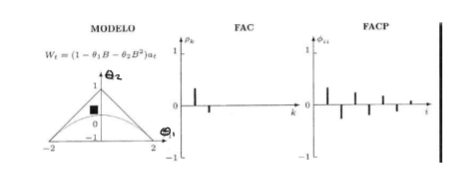

**Modelo MA(2):**

$$
W_t = (1 - \theta_1 B - \theta_2 B^2) a_t
$$

En el plano $(\theta_1, \theta_2)$, esta región está dentro del triángulo de invertibilidad donde se cumple:

- $\theta_1^2 + 4\theta_2 > 0$
- $\theta_1 < 0$


**FAC teórica**

Comportamiento de la función de autocorrelación:

$$
\rho_k =
\begin{cases}
\displaystyle\frac{-\theta_1 (1 - \theta_2)}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 1 \\
\displaystyle\frac{-\theta_2 + \theta_1^2 \theta_2}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 2 \\
0 & \text{si } k \geq 3
\end{cases}
$$

**FACP:**

- La función de autocorrelación parcial muestra valores distintos de cero en los primeros dos lags, truncándose a partir del tercero.

**Comportamiento:**

> Solo $\rho_1$ y $\rho_2$ son autocorrelaciones distintas de cero.
> A partir de $\rho_3$, todas las autocorrelaciones serán igual a cero.





**Ejemplo: Proceso MA(2)**

Dado el proceso:

$$
W_t = (1 + 0.5B - 0.2B^2)a_t
$$

**Parámetros:**

- $\theta_1 = -0.5$
- $\theta_2 = 0.2$



**Verificación del discriminante:**

$$
\theta_1^2 + 4\theta_2 = (-0.5)^2 + 4(0.2) = 0.25 + 0.8 = 1.05 > 0
$$


**Se cumplen las 3 condiciones de invertibilidad:**

1. $|\theta_2| = 0.2 < 1$

2. $\theta_1 + \theta_2 = -0.5 + 0.2 = -0.3 < 1$

3. $\theta_2 - \theta_1 = 0.2 - (-0.5) = 0.7 < 1$



**FAC teórica:**

La fórmula general para el proceso MA(2) es:

$$
\rho_k =
\begin{cases}
\displaystyle\frac{-\theta_1 (1 - \theta_2)}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 1 \\\\
\displaystyle\frac{-\theta_2 + \theta_1^2 \theta_2}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 2 \\\\
0 & \text{si } k \geq 3
\end{cases}
$$

**Cálculo numérico:**

1. Para $k = 1$:

$$
\rho_1 = \frac{-(-0.5)(1 - 0.2)}{1 + (-0.5)^2 + (0.2)^2}
= \frac{(0.5)(0.8)}{1 + 0.25 + 0.04}
= \frac{0.4}{1.29} \approx 0.31
$$

2. Para $k = 2$:

$$
\rho_2 = \frac{-0.2 + (-0.5)^2(0.2)}{1.29}
= \frac{-0.2 + 0.05}{1.29}
= \frac{-0.15}{1.29} \approx -0.116
$$

3. Para $k \geq 3$:

$$
\rho_k = 0
$$




**Gráfico de la FAC teórica:**

Visualmente se observan solo $\rho_1$ y $\rho_2$ distintos de cero. El resto son cero.
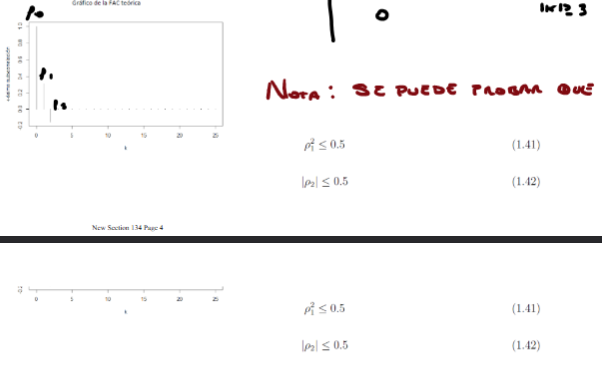

**Nota:**

Se puede probar que:

- $|\rho_1| \leq 0.5$
- $|\rho_2| \leq 0.5$

---


**Región Admisible #2: Discriminante > 0 y $\theta_{1} > 0$**

Consideramos el modelo:

$$
W_t = (1 - \theta_1 B - \theta_2 B^2)\alpha_t
$$



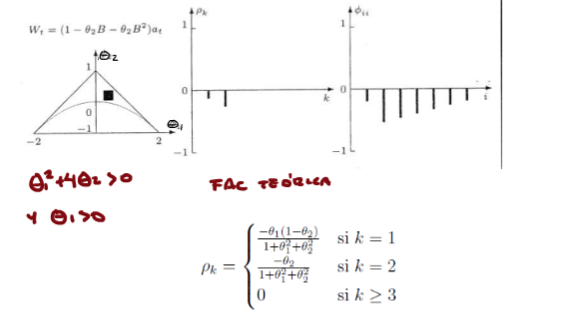



**Condiciones:**

- $\theta_1^2 + 4\theta_2 > 0$
- $\theta_2 > 0$


**FAC teórica:**

$$
\rho_k =
\begin{cases}
-\frac{\theta_1 (1 - \theta_2)}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 1 \\
-\frac{\theta_2}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 2 \\
0 & \text{si } k \geq 3
\end{cases}
$$

**Comportamiento:**
> Solo $\rho_1$ y $\rho_2$ son autocorrelaciones distintas de cero.

**Ejemplo**

Modelo:

$$
W_t = (1 - 0.3B - 0.4B^2)\alpha_t
$$

Parámetros:

- $\theta_1 = 0.3$
- $\theta_2 = 0.4$

Comprobación:

$$
\theta_1^2 + 4\theta_2 = (0.3)^2 + 4(0.4) = 0.09 + 1.6 = 1.69 > 0
$$



**Condiciones de invertibilidad:**

- $|\theta_2| = |0.4| < 1$
- $\theta_2 + \theta_1 = 0.7 < 1$
- $\theta_2 - \theta_1 = 0.1 < 1$

Cumple con las condiciones de invertibilidad



- $\theta_1 = 0.3$
- $\theta_2 = 0.4$

**Fórmulas:**

$$
\rho_k =
\begin{cases}
-\dfrac{\theta_1 (1 - \theta_2)}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 1 \\
-\dfrac{\theta_2}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 2 \\
0 & \text{si } k \geq 3
\end{cases}
$$


 Sustituyendo los valores

- $\rho_1 = -\dfrac{0.3 (1 - 0.4)}{1 + 0.3^2 + 0.4^2} = -\dfrac{0.3 (0.6)}{1 + 0.09 + 0.16} = -\dfrac{0.18}{1.25} = -0.144$

- $\rho_2 = -\dfrac{0.4}{1.25} = -0.32$

- $\rho_k = 0$ para $k \geq 3$



$$
\rho_k =
\begin{cases}
-0.14 & \text{si } k = 1 \\
-0.32 & \text{si } k = 2 \\
0 & \text{si } k \geq 3
\end{cases}
$$

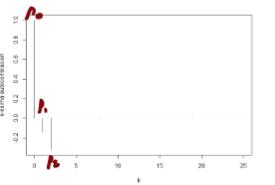

---



**Región Admisible #3: Discriminante < 0 ; $\theta_{1} < 0$**

**Modelo:**

$$
W_t = (1 - \theta_1 B - \theta_2 B^2) \alpha_t
$$



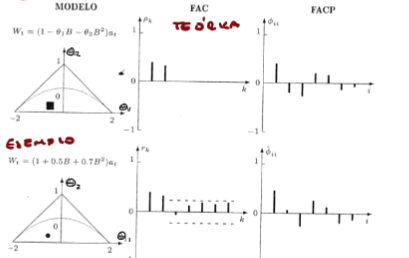


**Ejemplo:**

$$
W_t = (1 + 0.5B + 0.7B^2) \alpha_t
$$

**Parámetros:**

- $\theta_1 = -0.5$
- $\theta_2 = -0.7$

**Discriminante:**

$$
\theta_1^2 + 4\theta_2 = (-0.5)^2 + 4(-0.7) = 0.25 - 2.8 = -2.55 < 0
$$

**Se cumplen las condiciones de invertibilidad:**

- $|\theta_2| = 0.7 < 1$
- $\theta_1 + \theta_2 = -1.2 < 1$
- $\theta_2 - \theta_1 = -0.2 < 1$

**FAC teórica:**

$$
\rho_k =
\begin{cases}
-\dfrac{\theta_1 (1 - \theta_2)}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 1 \\
-\dfrac{\theta_2}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 2 \\
0 & \text{si } k \geq 3
\end{cases}
$$

**Sustituyendo:**

- $\rho_1 = -\dfrac{-0.5 (1 - (-0.7))}{1 + (-0.5)^2 + (-0.7)^2} = \dfrac{0.5 \cdot 1.7}{1 + 0.25 + 0.49} = \dfrac{0.85}{1.74} \approx 0.488$
- $\rho_2 = -\dfrac{-0.7}{1.74} = 0.402$
- $\rho_k = 0$ para $k \geq 3$

**Resultado final:**

$$
\rho_k =
\begin{cases}
0.48 & \text{si } k = 1 \\
0.40 & \text{si } k = 2 \\
0 & \text{si } k \geq 3
\end{cases}
$$


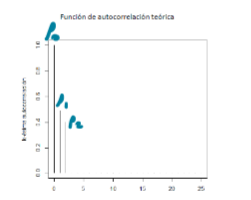

---

**Región Admisible #3: Discriminante < 0 ; $\theta_{1} < 0$**

**Modelo:**

$$
W_t = (1 - \theta_1 B - \theta_2 B^2) \alpha_t
$$


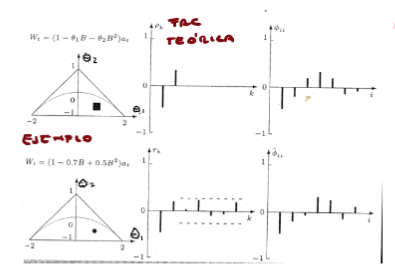


**Ejemplo:**

$$
W_t = (1 + 0.5B + 0.7B^2) \alpha_t
$$

**Parámetros:**

- $\theta_1 = 0.7$
- $\theta_2 = -0.5$

**Discriminante:**

$$
\theta_1^2 + 4\theta_2 = (0.7)^2 + 4(-0.5) = 0.49 - 2 = -1.51 < 0
$$

**Se cumplen las condiciones de invertibilidad:**

- $|\theta_1| = 0.7 < 1$
- $\theta_1 + \theta_2 = 0.2 < 1$
- $\theta_2 - \theta_1 = -0.12< 1$

**FAC teórica:**

$$
\rho_k =
\begin{cases}
-\dfrac{\theta_1 (1 - \theta_2)}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 1 \\
-\dfrac{\theta_2}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 2 \\
0 & \text{si } k \geq 3
\end{cases}
$$

**Sustituyendo:**

- $\rho_1 = -\dfrac{-0.7 (1 - (-0.5))}{1 + (0.7)^2 + (-0.5)^2} =\dfrac{-0.7 (1.5)}{1 + (0.7)^2 + (-0.5)^2}  = -0.603 $
- $\rho_2 = -\dfrac{-0.5}{1.74} = 0.28$
- $\rho_k = 0$ para $k \geq 3$

**Resultado final:**

$$
\rho_k =
\begin{cases}
-0.603 & \text{si } k = 1 \\
0.28 & \text{si } k = 2 \\
0 & \text{si } k \geq 3
\end{cases}
$$
